In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/머신러닝용.csv",encoding='cp949',index_col=0) 


In [2]:
클러스터링=클러스터링.loc[:,['분류']].reset_index()


In [3]:
편의점최종=pd.merge(클러스터링,편의점)

In [4]:
매출이중간인상권=편의점최종[편의점최종['분류']==0]
매출이낮은상권=편의점최종[편의점최종['분류']==1]
매출이높은상권=편의점최종[편의점최종['분류']==2]


In [5]:
print(str(매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max()))
print(str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max()))
print(str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max()))
 


5384271.5에서203620341.1
203737008.4775에서412845590.65
416968948.045에서1063667246.2631578


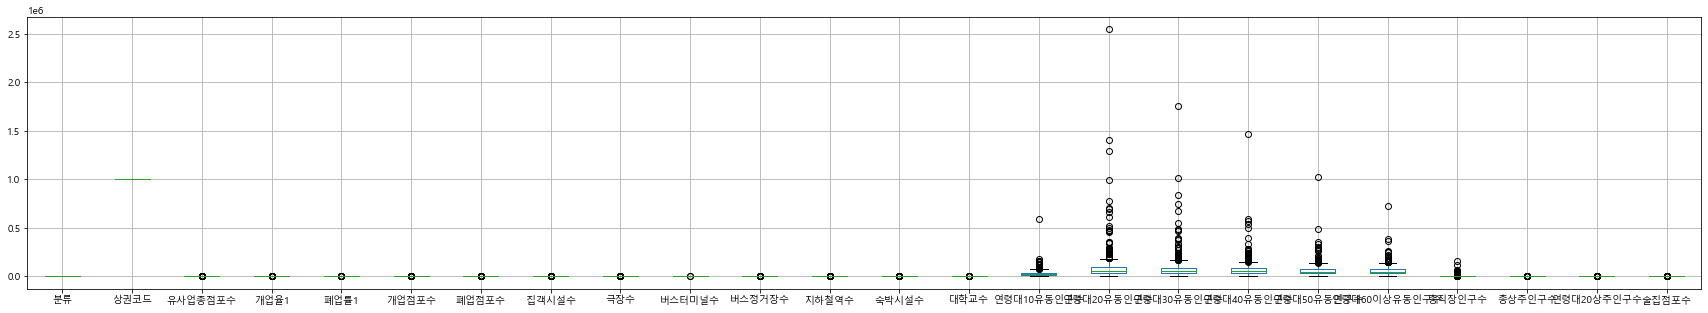

In [6]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이중간인상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [7]:
매출이중간인상권.columns

Index(['상권코드명', '분류', '상권코드', '시군구명', '유사업종점포수', '개업율1', '폐업률1', '개업점포수',
       '폐업점포수', '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수',
       '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대50유동인구수',
       '연령대60이상유동인구수', '총직장인구수', '총상주인구수', '연령대20상주인구수', '술집점포수', '점포별월매출금액'],
      dtype='object')

In [8]:
cols=[ '개업율1', '폐업률1', '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수', '연령대60이상유동인구수', '총직장인구수', '술집점포수']
X=매출이중간인상권[cols] #독립변수
y=매출이중간인상권['점포별월매출금액'] #종속변수]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
Xt_scaled=scaler.fit_transform(X_test)

In [11]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


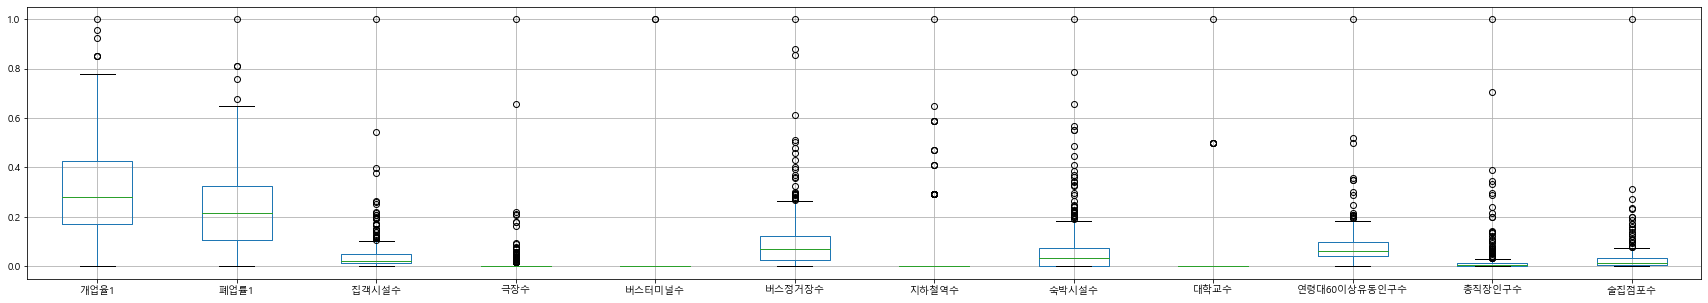

In [12]:
# 편의점.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
X_train_scaled.boxplot(figsize=(30,5))

In [13]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              86.48
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    2.64e-91
Time:                        17:54:14   Log-Likelihood:                         -6482.7
No. Observations:                 322   AIC:                                  1.299e+04
Df Residuals:                     310   BIC:                                  1.303e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
개업율1          3.163e+08   4.13e+07      7.657      0.000    2.35e+08    3.98e+08
폐업률1          1.738e+08   4.94e+07      3.519      0.000    7.66e+07    2.71e+08
집객시설수        -6.123e+08   2.47e+08     -2.483      0.014    -1.1e+09   -1.27e+08
극장수          -5.984e+08    1.6e+08     -3.735      0.000   -9.14e+08   -2.83e+08
버스터미널수        2.455e+07   1.03e+08      0.238      0.812   -1.79e+08    2.28e+08
버스정거장수         4.16e+08   9.81e+07      4.240      0.000    2.23e+08    6.09e+08
지하철역수        -9.454e+07   6.91e+07     -1.369      0.172    -2.3e+08    4.14e+07
숙박시설수         2.028e+08   9.05e+07      2.241      0.026    2.48e+07    3.81e+08
대학교수          1.187e+08   9.79e+07      1.212      0.226   -7.39e+07    3.11e+08
연령대60이상유동인구수  8.931e+08   1.34e+08      6.659      0.000    6.29e+08    1.16e+09
총직장인구수        1.059e+07   1.42e+08      0.075      0.940   -2.68e+08     2.9e+08
술집점포수        -3.292e+06   1.53e+08     -0.021      0.983   -3.05e+08    2.98e+08
==============================================================================
Omnibus:                        6.341   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.605
Skew:                          -0.250   Prob(JB):                       0.0368
Kurtosis:                       3.492   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
11,9.443745,집객시설수
10,4.297317,버스정거장수
9,4.112178,연령대60이상유동인구수
8,3.769310,개업율1
7,3.504648,폐업률1
6,2.834903,숙박시설수
5,2.649591,총직장인구수
4,2.395023,극장수
3,2.301180,술집점포수
2,1.989411,지하철역수
